# Portfolio Optimization Using Monte Carlo Simulations

### David Heller

In this notebook, we aim to optimize a portfolio of eight stocks by maximizing the Sharpe Ratio, which measures risk-adjusted returns.


## 1. What is Portfolio Optimization?
Portfolio optimization is the process of dividing investments across various assets to achieve specific financial goals, such as:

Maximizing returns,

Minimizing risk, or

Balancing risk and return.

By strategically allocating investments, we can create a portfolio that is resilient to market fluctuations while still providing strong returns. In this analysis, we will use the Sharpe Ratio as our primary metric for assessing portfolio performance.

## 2. The Sharpe Ratio

The **Sharpe Ratio** is a key metric used to evaluate the portfolio's risk-adjusted return. It tells us how much return we are achieving for each unit of risk taken. A higher Sharpe Ratio indicates better risk-adjusted performance, meaning we're earning more returns for each unit of risk.

Formula:

Sharpe Ratio = (Expected return of portfolio - risk free rate of return) / standard deviation of the portfolio's return

-Portfolio Return: The average return of the portfolio over a given period.

-Risk-Free Rate: The return of an investment with no risk (e.g., Treasury bonds). For simplicity, we assume this to be 0.

-Portfolio Volatility: A measure of how much the portfolio's returns fluctuate (calculated as the standard deviation of returns).

## 3. Monte Carlo Simulation

Monte Carlo simulation is a statistical technique used to model and analyze uncertain scenarios. In portfolio optimization, we use Monte Carlo simulations to:

1. Generate thousands of random portfolio allocations.
2. Calculate the expected return, risk (volatility), and Sharpe Ratio for each allocation.
3. Identify the allocation with the highest Sharpe Ratio.

Monte Carlo simulations are particularly useful because:

-They explore a wide range of possible portfolio configurations.
-They allow us to find the "optimal" portfolio in terms of risk and return.

## 4. Importing Libraries

We start by importing the necessary Python libraries:

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 5. Loading and Preparing Stock Price Data

We will work with historical stock price data for our eight stocks. The Close price represents the daily closing price of each stock.

Steps:

1. Load data for each stock.
2. Ensure the Date column is properly formatted as a datetime object.
3. Rename the closing price column to Close for consistency.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Loading the data
df_google = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/GOOGLE.csv')
df_netflix = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/NETFLIX.csv')
df_ibm = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/IBM.csv')
df_jnj = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/JNJ.csv')
df_ko = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/KO.csv')
df_msft = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/MSFT.csv')
df_nke = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/NIKE.csv')
df_aapl = pd.read_csv('/content/drive/MyDrive/DS Capstone Code/APPLE.csv')

In [16]:
df_google.head()

,Date,Adj Close,GOOGL_Close(t),High,Low,Open,Volume,GOOGL_Close(t-1),GOOGL_Close(t-2),GOOGL_Close(t-5),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
0,2009-10-16 00:00:00+00:00,13.726023,13.760010,13.882633,13.626877,13.696947,353322324,13.261011,13.396396,12.919169,...,42,0,0,0,0,0,0,0,2009,10
1,2009-10-19 00:00:00+00:00,13.781940,13.816066,13.853854,13.731982,13.831081,128587284,13.760010,13.261011,13.114114,...,43,0,0,0,0,0,0,0,2009,10
2,2009-10-20 00:00:00+00:00,13.772703,13.806807,13.837588,13.531031,13.804805,161586252,13.816066,13.760010,13.165916,...,43,0,0,0,0,0,0,0,2009,10
3,2009-10-21 00:00:00+00:00,13.757226,13.791291,13.997748,13.738739,13.761512,146677176,13.806807,13.816066,13.396396,...,43,0,0,0,0,0,0,0,2009,10
4,2009-10-22 00:00:00+00:00,13.831865,13.866116,13.888889,13.713714,13.763764,93366540,13.791291,13.806807,13.261011,...,43,0,0,0,0,0,0,0,2009,10


In [17]:
# Combine all DataFrames into a list
dfs = [df_google, df_netflix, df_ibm, df_jnj, df_ko, df_msft, df_nke, df_aapl]
stock_names = ['Google', 'Netflix', 'IBM', 'JNJ', 'KO', 'MSFT', 'NKE', 'AAPL']

In [18]:
# Ensure the 'Date' column is in datetime format and set as the index
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

In [19]:
# Renaming the Close column for each DataFrame
close_columns = ['GOOGL_Close(t)', 'NFLX_Close(t)', 'IBM_Close(t)', 'JNJ_Close(t)',
                 'KO_Close(t)', 'MSFT_Close(t)', 'NKE_Close(t)', 'AAPL_Close(t)']

for df, close_col in zip(dfs, close_columns):
    df.rename(columns={close_col: 'Close'}, inplace=True)

In [20]:
df_google.head()

,Adj Close,Close,High,Low,Open,Volume,GOOGL_Close(t-1),GOOGL_Close(t-2),GOOGL_Close(t-5),GOOGL_Close(t-10),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-16 00:00:00+00:00,13.726023,13.760010,13.882633,13.626877,13.696947,353322324,13.261011,13.396396,12.919169,12.126627,...,42,0,0,0,0,0,0,0,2009,10
2009-10-19 00:00:00+00:00,13.781940,13.816066,13.853854,13.731982,13.831081,128587284,13.760010,13.261011,13.114114,12.225225,...,43,0,0,0,0,0,0,0,2009,10
2009-10-20 00:00:00+00:00,13.772703,13.806807,13.837588,13.531031,13.804805,161586252,13.816066,13.760010,13.165916,12.480981,...,43,0,0,0,0,0,0,0,2009,10
2009-10-21 00:00:00+00:00,13.757226,13.791291,13.997748,13.738739,13.761512,146677176,13.806807,13.816066,13.396396,12.951451,...,43,0,0,0,0,0,0,0,2009,10
2009-10-22 00:00:00+00:00,13.831865,13.866116,13.888889,13.713714,13.763764,93366540,13.791291,13.806807,13.261011,12.867367,...,43,0,0,0,0,0,0,0,2009,10


## 6. Calculating Log Returns

Why use log returns?

Logarithmic returns (log returns) are commonly used in portfolio optimization for several reasons:

1. Additivity Over Time: Log returns are additive, which makes them convenient for Monte Carlo simulations and multi-period modeling. For example: Total Log Return over 3 days = Day 1 Log Return + Day 2 Log Return + Day 3 Log Return
2. Symmetry: Unlike simple percentage returns, log returns treat gains and losses symmetrically. For instance: A 10% increase followed by a 10% decrease results in a net log return of 0, accurately reflecting no net change.

The formula for leg returns is:

Log Return = ln(Current Price/Previous Price)

Note: Log returns do not directly correspond to the actual percentage change in portfolio value. While they are useful for optimization, the Sharpe Ratio derived from log returns reflects theoretical risk-adjusted performance rather than realized portfolio growth.

In [21]:
# Calculate log returns for each stock
log_returns = pd.DataFrame()

for df, stock_name in zip(dfs, stock_names):
    log_returns[stock_name] = np.log(df['Close'] / df['Close'].shift(1))

# Drop NaN values caused by shifting
log_returns.dropna(inplace=True)

# Checking the first few rows of log returns
print(log_returns.head())

                             Google   Netflix       IBM       JNJ        KO  \
Date                                                                          
2009-10-19 00:00:00+00:00  0.004066  0.016399  0.011606  0.011511 -0.004007   
2009-10-20 00:00:00+00:00 -0.000670 -0.017011 -0.001952 -0.009364 -0.013228   
2009-10-21 00:00:00+00:00 -0.001124 -0.022933 -0.016004 -0.004632  0.000000   
2009-10-22 00:00:00+00:00  0.005411  0.036524  0.014945  0.010392  0.001479   
2009-10-23 00:00:00+00:00 -0.000722  0.100736 -0.019174 -0.006585 -0.016948   

                               MSFT       NKE      AAPL  
Date                                                     
2009-10-19 00:00:00+00:00 -0.005297  0.015093  0.009579  
2009-10-20 00:00:00+00:00  0.000379 -0.015247  0.045811  
2009-10-21 00:00:00+00:00  0.007932 -0.005237  0.030522  
2009-10-22 00:00:00+00:00  0.000376  0.006772  0.001365  
2009-10-23 00:00:00+00:00  0.052383 -0.015770 -0.006159  


## 7. Understanding the Covariance Matrix

The covariance matrix quantifies the relationship between the returns of different stocks. It shows how the returns of one stock move in relation to another.

For example:

-A positive covariance indicates that two stocks tend to move in the same direction.

-A negative covariance indicates that two stocks tend to move in opposite directions.

The covariance matrix is crucial for calculating portfolio risk (volatility), as it accounts for diversification effects.

In [22]:
# Calculate the annualized covariance matrix
cov_matrix = log_returns.cov() * 252  # 252 trading days in a year

In [23]:
cov_matrix

,Google,Netflix,IBM,JNJ,KO,MSFT,NKE,AAPL
Google,0.073415,0.048423,0.023751,0.015359,0.016083,0.044380,0.032173,0.042044
Netflix,0.048423,0.253563,0.017910,0.012602,0.010302,0.044129,0.036262,0.042131
IBM,0.023751,0.017910,0.049631,0.016239,0.017800,0.026032,0.022855,0.024577
JNJ,0.015359,0.012602,0.016239,0.028041,0.014684,0.016799,0.015441,0.015463
KO,0.016083,0.010302,0.017800,0.014684,0.029400,0.017507,0.018495,0.016165
MSFT,0.044380,0.044129,0.026032,0.016799,0.017507,0.065546,0.031829,0.042035
NKE,0.032173,0.036262,0.022855,0.015441,0.018495,0.031829,0.077756,0.032309
AAPL,0.042044,0.042131,0.024577,0.015463,0.016165,0.042035,0.032309,0.078568


The covariance matrix of log returns reveals key insights into stock variability and co-movement. Netflix has the highest volatility (0.253563), making it the most unpredictable, while JNJ (0.028041) is the most stable. Tech stocks like Google, Microsoft, Apple, and Netflix exhibit high covariances, reflecting shared market influences (e.g., Google and Microsoft: 0.044380). In contrast, defensive stocks like JNJ and KO have low covariances with others, offering diversification potential.

From a portfolio perspective, tech stocks' strong correlations limit diversification when combined, whereas low-covariance stocks like JNJ and KO can help reduce risk. High-variance stocks like Netflix may offer greater returns but increase overall portfolio risk.

## 8. Manual Portfolio Allocation

To establish a baseline, we calculate the Sharpe Ratio for a manual portfolio with fixed weights.

Steps:

1. Define arbitrary weights for each stock.
2. Calculate the expected portfolio return as the weighted average of stock returns.
3. Calculate the portfolio volatility using the covariance matrix.
C4. ompute the Sharpe Ratio.

In [24]:
# Define manual portfolio weights
manual_weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]) # Lets say our strategy is to allocate equal weights

# Calculate manual portfolio metrics
manual_return = np.dot(log_returns.mean(), manual_weights) * 252  # Annualized return
manual_volatility = np.sqrt(np.dot(manual_weights.T, np.dot(cov_matrix, manual_weights)))  # Annualized volatility
manual_sharpe = manual_return / manual_volatility  # Sharpe Ratio

print("Manual Portfolio Metrics:")
print(f"  Annualized Return: {manual_return:.4f}")
print(f"  Annualized Volatility: {manual_volatility:.4f}")
print(f"  Sharpe Ratio: {manual_sharpe:.4f}")

Manual Portfolio Metrics:
  Annualized Return: 0.1481
  Annualized Volatility: 0.1804
  Sharpe Ratio: 0.8210


## 9. Monte Carlo Simulation for Portfolio Optimization

Monte Carlo simulation is a technique used to explore a wide range of possible scenarios by repeatedly running experiments with random inputs. In portfolio optimization, it helps us find the best way to allocate our investments across multiple stocks by simulating thousands of potential portfolios. Here's how it works in simpler terms:

1. Random Allocation of Investments:

  - The simulation starts by randomly assigning percentages (weights) of the total portfolio to each stock. For example, it might assign 30% to Google, 20% to Netflix, and so on.
  - These weights are adjusted so that the total always adds up to 100% of the portfolio.

2. Calculating Portfolio Performance:

  For each random allocation, the simulation calculates:

  - Expected Return: How much we expect the portfolio to grow based on the historical performance of the stocks.
  - Risk (Volatility): How much the portfolio's value is likely to fluctuate. This is based on how individual stock prices move and how they are related to each other.
  - Sharpe Ratio: This measures how much return we get for every unit of risk. A higher Sharpe Ratio means a better balance between risk and reward.

3. Repeating the Process:

  - This process is repeated thousands of times (e.g., 5,000 simulated portfolios). Each time, a new set of random weights is generated, and the performance metrics are calculated for that specific portfolio.

4. Finding the Best Portfolio:

  - After running all the simulations, we compare the Sharpe Ratios of all the portfolios. The portfolio with the highest Sharpe Ratio is considered the best because it offers the most return for the least amount of risk.

#### Why Use Monte Carlo Simulations?

1. Exploring All Possibilities:

  - Instead of guessing or using fixed rules, Monte Carlo simulation tries many different combinations of investments. This ensures that we don't miss out on better allocations that we might not have thought of.

2. Handling Complexity:

  - With multiple stocks in a portfolio, it's hard to figure out the best allocation manually. Monte Carlo simulation makes this easier by automating the process and evaluating thousands of options.

3. Balancing Risk and Reward:

  - By focusing on the Sharpe Ratio, the simulation helps us find a portfolio that gives good returns without taking on too much risk.


In this case, we have 8 stocks to invest in, and we're not sure how to divide the money. Should we put more in Google or Apple? What about Netflix? By running a Monte Carlo simulation, we can test thousands of ways to split our money and see how each one performs. In the end, we'll know how to allocate our investments to get the best risk-adjusted return.

This technique doesn't guarantee future performance because it relies on historical data, but it provides a solid, data-driven approach to making smarter investment decisions.

Here, using Monte Carlo simulation, we generate 5,000 random portfolios to find the optimal allocation.

Steps:

1. Generate random weights for each portfolio.
2. Normalize the weights so they sum to 1.
3. Calculate the return, volatility, and Sharpe Ratio for each portfolio.
4. Identify the portfolio with the highest Sharpe Ratio.

In [25]:
# Monte Carlo Simulation
num_ports = 5000
all_weights = np.zeros((num_ports, len(stock_names)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for i in range(num_ports):
    # Randomly generate weights
    weights = np.random.random(len(stock_names))
    weights /= np.sum(weights)

    # Store the weights
    all_weights[i, :] = weights

    # Calculate portfolio metrics
    ret_arr[i] = np.dot(log_returns.mean(), weights) * 252
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

# Find the optimal portfolio
max_sharpe_idx = sharpe_arr.argmax()
optimal_weights = all_weights[max_sharpe_idx]
optimal_return = ret_arr[max_sharpe_idx]
optimal_volatility = vol_arr[max_sharpe_idx]
optimal_sharpe = sharpe_arr[max_sharpe_idx]

print("Monte Carlo Optimized Portfolio Metrics:")
print(f"  Annualized Return: {optimal_return:.4f}")
print(f"  Annualized Volatility: {optimal_volatility:.4f}")
print(f"  Sharpe Ratio: {optimal_sharpe:.4f}")


Monte Carlo Optimized Portfolio Metrics:
  Annualized Return: 0.1986
  Annualized Volatility: 0.2182
  Sharpe Ratio: 0.9101


## 10. Comparing Manual and Optimized Portfolios

In [26]:
print("Comparison of Sharpe Ratios:")
print(f"  Manual Portfolio Sharpe Ratio: {manual_sharpe:.4f}")
print(f"  Monte Carlo Optimized Sharpe Ratio: {optimal_sharpe:.4f}")

Comparison of Sharpe Ratios:
  Manual Portfolio Sharpe Ratio: 0.8210
  Monte Carlo Optimized Sharpe Ratio: 0.9101


**Improved Risk-Adjusted Performance:**

- The Monte Carlo optimized portfolio achieves a Sharpe Ratio of 0.9101, which is higher than the manual portfolio's Sharpe Ratio of 0.8210.
- This indicates that the Monte Carlo optimization provides better risk-adjusted returns, meaning the portfolio generates more returns per unit of risk compared to the manual allocation.

**Effectiveness of Optimization:**

- The Monte Carlo simulation explores a wide range of portfolio allocations, identifying the one that maximizes the Sharpe Ratio.
- By diversifying investments optimally across the eight stocks, the optimization process achieves a more efficient balance between risk and return compared to the arbitrary weights in the manual portfolio.

**Limitations of Manual Allocation:**

- The manual portfolio's weights are chosen arbitrarily and do not account for key factors like stock correlations, individual stock volatility, or historical performance.
- This explains why the Sharpe Ratio of the manual portfolio is lower—it's not optimized for either maximizing returns or minimizing risk.

**Practical Implications:**

- The insights highlight the importance of using data-driven techniques, such as Monte Carlo simulations, for portfolio optimization.
- For individual investors or portfolio managers, leveraging these methods can lead to more informed and effective investment decisions.

## 11. Pie Charts for Allocation Comparison

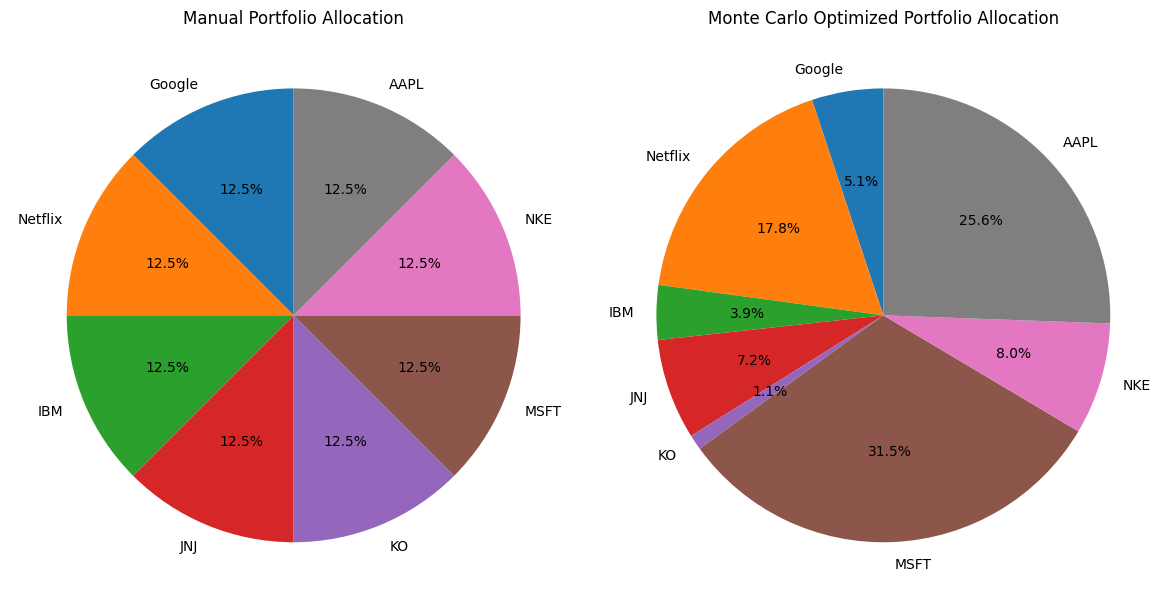

In [27]:
# Stock names
labels = ['Google', 'Netflix', 'IBM', 'JNJ', 'KO', 'MSFT', 'NKE', 'AAPL']

# Manual weights and optimized weights
manual_allocations = manual_weights  # Equal weights
optimized_allocations = optimal_weights  # Weights from Monte Carlo simulation

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Manual portfolio pie chart
ax[0].pie(manual_allocations, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Manual Portfolio Allocation')

# Monte Carlo optimized portfolio pie chart
ax[1].pie(optimized_allocations, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Monte Carlo Optimized Portfolio Allocation')

# Display the pie charts
plt.tight_layout()
plt.show()

The comparison between the manual and Monte Carlo optimized portfolio allocations highlights the importance of data-driven approaches to investment strategies. The manual portfolio adopts an equal-weight allocation strategy, with 12.5% of the portfolio allocated to each stock. While this ensures simplicity and diversification, it fails to account for key factors such as individual stock volatility, correlation, and historical performance. For example, stocks with higher volatility, like Netflix, may introduce more risk than intended, while strongly correlated stocks, such as those in the tech sector, may not provide adequate diversification.

In contrast, the Monte Carlo optimized portfolio strategically adjusts weights to maximize the Sharpe Ratio, a measure of risk-adjusted returns. The optimized allocation heavily favors Microsoft (31.5%) and Apple (25.6%) due to their strong historical returns and moderate volatility. Stocks like IBM (3.9%) and Coca-Cola (1.1%) receive minimal allocations, likely because of their lower returns or limited diversification benefits. Netflix (17.8%), despite its high volatility, is given a substantial allocation due to its potential for significant returns. Additionally, lower-correlated and stable stocks like Johnson & Johnson (7.2%) are included to mitigate risk and enhance portfolio stability.

The Sharpe Ratio for the Monte Carlo optimized portfolio (0.9101) is higher than that of the manual portfolio (0.8210), indicating superior risk-adjusted performance. This improvement demonstrates that the optimized portfolio effectively balances risk and return by leveraging historical data, minimizing volatility, and strategically diversifying investments. Overall, the analysis underscores the value of quantitative techniques, such as Monte Carlo simulations, in crafting portfolios that outperform simplistic allocation strategies. For investors, this approach provides a robust framework for maximizing returns while managing risks in dynamic markets.